In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

'%.3f'

In [2]:
# 3列3行のデータを作成し、インデックスとカラムを設定
hier_df= DataFrame(
    np.arange(9).reshape((3,3)),
    index = [
        ['a','a','b'],
        [1,2,2]
    ], 
    columns = [
        ['Osaka','Tokyo','Osaka'],
        ['Blue','Red','Red']
    ]
)
hier_df

Osaka Tokyo Osaka
     Blue   Red   Red
a 1     0     1     2
  2     3     4     5
b 2     6     7     8

In [5]:
hier_df.index.names = ['key1', 'key2']
hier_df.columns.names = ['city', 'color']
hier_df

city      Osaka Tokyo Osaka
color      Blue   Red   Red
key1 key2                  
a    1        0     1     2
     2        3     4     5
b    2        6     7     8

In [6]:
hier_df['Osaka']

color      Blue  Red
key1 key2           
a    1        0    2
     2        3    5
b    2        6    8

In [8]:
hier_df.sum(level = 'key2', axis = 0)

city,Osaka,Tokyo,Osaka
color,Blue,Red,Red
key2,,,
1,0,1,2
2,9,11,13


In [11]:
hier_df.sum(level = 'color', axis = 1)

color      Blue  Red
key1 key2           
a    1        0    3
     2        3    9
b    2        6   15

In [12]:
hier_df.drop(['b'])

city      Osaka Tokyo Osaka
color      Blue   Red   Red
key1 key2                  
a    1        0     1     2
     2        3     4     5

In [14]:
#practice 6-1
hier_df1 = DataFrame(
    np.arange(12).reshape((3,4)),
    index = [['c','d','d'],[1,2,1]],
    columns = [
        ['Kyoto','Nagoya','Hokkaido','Kyoto'],
        ['Yellow','Yellow','Red','Blue']
    ]
)

hier_df1.index.names = ['key1','key2']
hier_df1.columns.names = ['city','color']
hier_df1['Kyoto']

color      Yellow  Blue
key1 key2              
c    1          0     3
d    2          4     7
     1          8    11

In [15]:
#paractice 6-2
hier_df1.mean(level='city', axis=1)

city       Kyoto  Nagoya  Hokkaido
key1 key2                         
c    1       1.5     1.0       2.0
d    2       5.5     5.0       6.0
     1       9.5     9.0      10.0

In [16]:
#practice 6-3
hier_df1.sum(level='key2', axis=0)

city,Kyoto,Nagoya,Hokkaido,Kyoto
color,Yellow,Yellow,Red,Blue
key2,,,,
1,8,10,12,14
2,4,5,6,7


In [17]:
# データ1の準備
data1 = {
    'id': ['100', '101', '102', '103', '104', '106', '108', '110', '111',' 113'],
    'city': ['Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo', 'Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo'],
    'birth_year': [1990, 1989, 1992, 1997, 1982, 1991, 1988, 1990, 1995, 1981],
    'name': ['Hiroshi', 'Akiko', 'Yuki', 'Satoru', 'Steeve', 'Mituru', 'Aoi', 'Tarou', 'Suguru','Mitsuo']
}
df1 = DataFrame(data1)
df1

,id,city,birth_year,name
0,100,Tokyo,1990,Hiroshi
1,101,Osaka,1989,Akiko
2,102,Kyoto,1992,Yuki
3,103,Hokkaido,1997,Satoru
4,104,Tokyo,1982,Steeve
5,106,Tokyo,1991,Mituru
6,108,Osaka,1988,Aoi
7,110,Kyoto,1990,Tarou
8,111,Hokkaido,1995,Suguru
9,113,Tokyo,1981,Mitsuo


In [18]:
# データ2の準備
data2 = {
    'id': ['100', '101', '102', '105', '107'],
    'math': [50, 43, 33, 76, 98],
    'english': [90, 30, 20, 50, 30],
    'sex': ['M','F','F','M','M'], 
    'index_num': [0, 1, 2, 3, 4]
}
df2 = DataFrame(data2)
df2

,id,math,english,sex,index_num
0,100,50,90,M,0
1,101,43,30,F,1
2,102,33,20,F,2
3,105,76,50,M,3
4,107,98,30,M,4


In [19]:
#内部結合
#mergeメソッドのデフォルト設定は内部結合
print('結合テーブル')
pd.merge(df1, df2, on = 'id') #結合のキーとなるものをonで指定

結合テーブル


,id,city,birth_year,name,math,english,sex,index_num
0,100,Tokyo,1990,Hiroshi,50,90,M,0
1,101,Osaka,1989,Akiko,43,30,F,1
2,102,Kyoto,1992,Yuki,33,20,F,2


In [20]:
#全結合
#結合するものがない場合はNaNになる
pd.merge(df1, df2, how = 'outer')

,id,city,birth_year,name,math,english,sex,index_num
0,100,Tokyo,1990.0,Hiroshi,50.0,90.0,M,0.0
1,101,Osaka,1989.0,Akiko,43.0,30.0,F,1.0
2,102,Kyoto,1992.0,Yuki,33.0,20.0,F,2.0
3,103,Hokkaido,1997.0,Satoru,NaN,NaN,NaN,NaN
4,104,Tokyo,1982.0,Steeve,NaN,NaN,NaN,NaN
5,106,Tokyo,1991.0,Mituru,NaN,NaN,NaN,NaN
6,108,Osaka,1988.0,Aoi,NaN,NaN,NaN,NaN
7,110,Kyoto,1990.0,Tarou,NaN,NaN,NaN,NaN
8,111,Hokkaido,1995.0,Suguru,NaN,NaN,NaN,NaN
9,113,Tokyo,1981.0,Mitsuo,NaN,NaN,NaN,NaN


In [21]:
#左側のデータのインデックスと，右側のデータのindex_numカラムをキーとして指定
pd.merge(df1, df2, left_index = True, right_on = 'index_num')

,id_x,city,birth_year,name,id_y,math,english,sex,index_num
0,100,Tokyo,1990,Hiroshi,100,50,90,M,0
1,101,Osaka,1989,Akiko,101,43,30,F,1
2,102,Kyoto,1992,Yuki,102,33,20,F,2
3,103,Hokkaido,1997,Satoru,105,76,50,M,3
4,104,Tokyo,1982,Steeve,107,98,30,M,4


In [23]:
#左外部結合
pd.merge(df1,df2,how='left')

,id,city,birth_year,name,math,english,sex,index_num
0,100,Tokyo,1990,Hiroshi,50.0,90.0,M,0.0
1,101,Osaka,1989,Akiko,43.0,30.0,F,1.0
2,102,Kyoto,1992,Yuki,33.0,20.0,F,2.0
3,103,Hokkaido,1997,Satoru,NaN,NaN,NaN,NaN
4,104,Tokyo,1982,Steeve,NaN,NaN,NaN,NaN
5,106,Tokyo,1991,Mituru,NaN,NaN,NaN,NaN
6,108,Osaka,1988,Aoi,NaN,NaN,NaN,NaN
7,110,Kyoto,1990,Tarou,NaN,NaN,NaN,NaN
8,111,Hokkaido,1995,Suguru,NaN,NaN,NaN,NaN
9,113,Tokyo,1981,Mitsuo,NaN,NaN,NaN,NaN


In [24]:
#縦結合
# データ3の準備
data3 = {
    'id': ['117', '118', '119', '120', '125'],
    'city': ['Chiba', 'Kanagawa', 'Tokyo', 'Fukuoka', 'Okinawa'],
    'birth_year': [1990, 1989, 1992, 1997, 1982],
    'name': ['Suguru', 'Kouichi', 'Satochi', 'Yukie', 'Akari']
}
df3 = DataFrame(data3)
df3

concat_data = pd.concat([df1, df2])
concat_data

,id,city,birth_year,name,math,english,sex,index_num
0,100,Tokyo,1990.0,Hiroshi,NaN,NaN,NaN,NaN
1,101,Osaka,1989.0,Akiko,NaN,NaN,NaN,NaN
2,102,Kyoto,1992.0,Yuki,NaN,NaN,NaN,NaN
3,103,Hokkaido,1997.0,Satoru,NaN,NaN,NaN,NaN
4,104,Tokyo,1982.0,Steeve,NaN,NaN,NaN,NaN
5,106,Tokyo,1991.0,Mituru,NaN,NaN,NaN,NaN
6,108,Osaka,1988.0,Aoi,NaN,NaN,NaN,NaN
7,110,Kyoto,1990.0,Tarou,NaN,NaN,NaN,NaN
8,111,Hokkaido,1995.0,Suguru,NaN,NaN,NaN,NaN
9,113,Tokyo,1981.0,Mitsuo,NaN,NaN,NaN,NaN


In [26]:
#practice 6-4
# データ4の準備
data4 = {
    'id': ['0', '1', '2', '3', '4', '6', '8', '11', '12', '13'],
    'city': ['Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo', 'Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo'],
    'birth_year': [1990, 1989, 1992, 1997, 1982, 1991, 1988, 1990, 1995, 1981],
    'name': ['Hiroshi', 'Akiko', 'Yuki', 'Satoru', 'Steeve', 'Mituru', 'Aoi', 'Tarou', 'Suguru', 'Mitsuo']
}
df4 = DataFrame(data4)
df4

# データ5の準備
data5 = {
    'id': ['0', '1', '3', '6', '8'],
    'math' : [20, 30, 50, 70, 90],
    'english': [30, 50, 50, 70, 20],
    'sex': ['M', 'F', 'F', 'M', 'M'],
    'index_num': [0, 1, 2, 3, 4]
}
df5 = DataFrame(data5)
df5

pd.merge(df4, df5, on='id')

,id,city,birth_year,name,math,english,sex,index_num
0,0,Tokyo,1990,Hiroshi,20,30,M,0
1,1,Osaka,1989,Akiko,30,50,F,1
2,3,Hokkaido,1997,Satoru,50,50,F,2
3,6,Tokyo,1991,Mituru,70,70,M,3
4,8,Osaka,1988,Aoi,90,20,M,4


In [27]:
#practice 6-5
pd.merge(df4, df5, how='outer')

,id,city,birth_year,name,math,english,sex,index_num
0,0,Tokyo,1990,Hiroshi,20.0,30.0,M,0.0
1,1,Osaka,1989,Akiko,30.0,50.0,F,1.0
2,2,Kyoto,1992,Yuki,NaN,NaN,NaN,NaN
3,3,Hokkaido,1997,Satoru,50.0,50.0,F,2.0
4,4,Tokyo,1982,Steeve,NaN,NaN,NaN,NaN
5,6,Tokyo,1991,Mituru,70.0,70.0,M,3.0
6,8,Osaka,1988,Aoi,90.0,20.0,M,4.0
7,11,Kyoto,1990,Tarou,NaN,NaN,NaN,NaN
8,12,Hokkaido,1995,Suguru,NaN,NaN,NaN,NaN
9,13,Tokyo,1981,Mitsuo,NaN,NaN,NaN,NaN


In [29]:
#practice 6-6
# データの準備
data6 = {
    'id': ['70', '80', '90', '120', '150'],
    'city': ['Chiba', 'Kanagawa', 'Tokyo', 'Fukuoka', 'Okinawa'],
    'birth_year': [1980, 1999, 1995, 1994, 1994],
    'name': ['Suguru', 'Kouichi', 'Satochi', 'Yukie', 'Akari']
}
df6 = DataFrame(data6)

pd.concat([df4, df6])

,id,city,birth_year,name
0,0,Tokyo,1990,Hiroshi
1,1,Osaka,1989,Akiko
2,2,Kyoto,1992,Yuki
3,3,Hokkaido,1997,Satoru
4,4,Tokyo,1982,Steeve
5,6,Tokyo,1991,Mituru
6,8,Osaka,1988,Aoi
7,11,Kyoto,1990,Tarou
8,12,Hokkaido,1995,Suguru
9,13,Tokyo,1981,Mitsuo


In [30]:
#ピボット操作
hier_df

city      Osaka Tokyo Osaka
color      Blue   Red   Red
key1 key2                  
a    1        0     1     2
     2        3     4     5
b    2        6     7     8

In [31]:
hier_df.stack()

city             Osaka  Tokyo
key1 key2 color              
a    1    Blue       0    NaN
          Red        2    1.0
     2    Blue       3    NaN
          Red        5    4.0
b    2    Blue       6    NaN
          Red        8    7.0

In [34]:
hier_df.stack().unstack()

city      Osaka     Tokyo     
color      Blue Red  Blue  Red
key1 key2                     
a    1        0   2   NaN  1.0
     2        3   5   NaN  4.0
b    2        6   8   NaN  7.0

In [35]:
#　重複があるデータ
dupli_data = DataFrame({
        'col1': [1, 1, 2, 3, 4, 4, 6, 6],
        'col2': ['a', 'b', 'b', 'b', 'c', 'c', 'b', 'b']
})
print('・元のデータ')
dupli_data

・元のデータ


,col1,col2
0,1,a
1,1,b
2,2,b
3,3,b
4,4,c
5,4,c
6,6,b
7,6,b


In [37]:
dupli_data.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7     True
dtype: bool

In [38]:
dupli_data.drop_duplicates() #indexは変更されない

,col1,col2
0,1,a
1,1,b
2,2,b
3,3,b
4,4,c
6,6,b


In [39]:
#マッピング処理
# 参照データ
city_map ={
    'Tokyo': 'Kanto',
    'Hokkaido': 'Hokkaido',
    'Osaka': 'Kansai',
    'Kyoto':'Kansai'
}
city_map

{'Tokyo': 'Kanto',
 'Hokkaido': 'Hokkaido',
 'Osaka': 'Kansai',
 'Kyoto': 'Kansai'}

In [40]:
df1['region'] = df1['city'].map(city_map)
df1

,id,city,birth_year,name,region
0,100,Tokyo,1990,Hiroshi,Kanto
1,101,Osaka,1989,Akiko,Kansai
2,102,Kyoto,1992,Yuki,Kansai
3,103,Hokkaido,1997,Satoru,Hokkaido
4,104,Tokyo,1982,Steeve,Kanto
5,106,Tokyo,1991,Mituru,Kanto
6,108,Osaka,1988,Aoi,Kansai
7,110,Kyoto,1990,Tarou,Kansai
8,111,Hokkaido,1995,Suguru,Hokkaido
9,113,Tokyo,1981,Mitsuo,Kanto


In [50]:
#無名関数とmapを組み合わせる
#　birth_year の上3つの数字・文字を取り出す
df1['up_two_num'] = df1['birth_year'].map(lambda x: str(x)[0:3])
df1

,id,city,birth_year,name,region,up_two_num,up_two_name
0,100,Tokyo,1990,Hiroshi,Kanto,199,Hir
1,101,Osaka,1989,Akiko,Kansai,198,Aki
2,102,Kyoto,1992,Yuki,Kansai,199,Yuk
3,103,Hokkaido,1997,Satoru,Hokkaido,199,Sat
4,104,Tokyo,1982,Steeve,Kanto,198,Ste
5,106,Tokyo,1991,Mituru,Kanto,199,Mit
6,108,Osaka,1988,Aoi,Kansai,198,Aoi
7,110,Kyoto,1990,Tarou,Kansai,199,Tar
8,111,Hokkaido,1995,Suguru,Hokkaido,199,Sug
9,113,Tokyo,1981,Mitsuo,Kanto,198,Mit


In [51]:
#　分割の粒度
birth_year_bins = [1980, 1985, 1990, 1995, 2000]

# ビン分割の実施
birth_year_cut_data = pd.cut(df1.birth_year, birth_year_bins)
birth_year_cut_data

0    (1985, 1990]
1    (1985, 1990]
2    (1990, 1995]
3    (1995, 2000]
4    (1980, 1985]
5    (1990, 1995]
6    (1985, 1990]
7    (1985, 1990]
8    (1990, 1995]
9    (1980, 1985]
Name: birth_year, dtype: category
Categories (4, interval[int64]): [(1980, 1985] < (1985, 1990] < (1990, 1995] < (1995, 2000]]

In [53]:
pd.value_counts(birth_year_cut_data)

(1985, 1990]    4
(1990, 1995]    3
(1980, 1985]    2
(1995, 2000]    1
Name: birth_year, dtype: int64

In [55]:
pd.value_counts(df1['city'])

Tokyo       4
Osaka       2
Kyoto       2
Hokkaido    2
Name: city, dtype: int64

In [56]:
# 名前をつける
group_names = ['early1980s', 'late1980s', 'early1990s', 'late1990s']
birth_year_cut_data = pd.cut(df1.birth_year, birth_year_bins, labels = group_names)
pd.value_counts(birth_year_cut_data)

late1980s     4
early1990s    3
early1980s    2
late1990s     1
Name: birth_year, dtype: int64

In [59]:
#birth_yearで２つに分割させる
hoge = pd.cut(df1.birth_year, 2)
hoge

0      (1989.0, 1997.0]
1    (1980.984, 1989.0]
2      (1989.0, 1997.0]
3      (1989.0, 1997.0]
4    (1980.984, 1989.0]
5      (1989.0, 1997.0]
6    (1980.984, 1989.0]
7      (1989.0, 1997.0]
8      (1989.0, 1997.0]
9    (1980.984, 1989.0]
Name: birth_year, dtype: category
Categories (2, interval[float64]): [(1980.984, 1989.0] < (1989.0, 1997.0]]

In [60]:
pd.value_counts(hoge)

(1989.0, 1997.0]      6
(1980.984, 1989.0]    4
Name: birth_year, dtype: int64

In [64]:
#分位点での分割も可能
pd.value_counts(pd.qcut(df1.birth_year, 2))

(1980.999, 1990.0]    6
(1990.0, 1997.0]      4
Name: birth_year, dtype: int64

In [71]:
#practice 6-7
student_math = pd.read_csv('student-mat.csv', sep=';')
student_math['age2'] = student_math['age']*2
student_math

In [76]:
#practice 6-8
absences_bins = [0,1,5,100]
pd.cut(student_math.absences, absences_bins, right = False)

0      [5, 100)
1        [1, 5)
2      [5, 100)
3        [1, 5)
4        [1, 5)
         ...   
390    [5, 100)
391      [1, 5)
392      [1, 5)
393      [0, 1)
394    [5, 100)
Name: absences, Length: 395, dtype: category
Categories (3, interval[int64]): [[0, 1) < [1, 5) < [5, 100)]

In [78]:
#practice 6-9
hoge = pd.qcut(student_math.absences, 3)
pd.value_counts(hoge)

(-0.001, 2.0]    183
(6.0, 75.0]      115
(2.0, 6.0]        97
Name: absences, dtype: int64

In [80]:
#サイズ確認（それぞれのcityの値がいくつあるのかを表示）
df1.groupby('city').size()

city
Hokkaido    2
Kyoto       2
Osaka       2
Tokyo       4
dtype: int64

In [81]:
df1.groupby('city')['birth_year'].mean()

city
Hokkaido    1996.0
Kyoto       1991.0
Osaka       1988.5
Tokyo       1986.0
Name: birth_year, dtype: float64

In [82]:
df1.groupby(['region', 'city'])['birth_year'].mean()

region    city    
Hokkaido  Hokkaido    1996.0
Kansai    Kyoto       1991.0
          Osaka       1988.5
Kanto     Tokyo       1986.0
Name: birth_year, dtype: float64

In [84]:
df1.groupby(['region', 'city'], as_index = False)['birth_year'].mean()

,region,city,birth_year
0,Hokkaido,Hokkaido,1996.0
1,Kansai,Kyoto,1991.0
2,Kansai,Osaka,1988.5
3,Kanto,Tokyo,1986.0


In [89]:
#regionの名前と，　そのreiginの行全てを抽出する
for group, subdf in df1.groupby('region'):
    print('==========================================================')
    print('Region Name:{0}'.format(group))
    print(subdf)

Region Name:Hokkaido
    id      city  birth_year    name    region up_two_num up_two_name
3  103  Hokkaido        1997  Satoru  Hokkaido        199         Sat
8  111  Hokkaido        1995  Suguru  Hokkaido        199         Sug
Region Name:Kansai
    id   city  birth_year   name  region up_two_num up_two_name
1  101  Osaka        1989  Akiko  Kansai        198         Aki
2  102  Kyoto        1992   Yuki  Kansai        199         Yuk
6  108  Osaka        1988    Aoi  Kansai        198         Aoi
7  110  Kyoto        1990  Tarou  Kansai        199         Tar
Region Name:Kanto
     id   city  birth_year     name region up_two_num up_two_name
0   100  Tokyo        1990  Hiroshi  Kanto        199         Hir
4   104  Tokyo        1982   Steeve  Kanto        198         Ste
5   106  Tokyo        1991   Mituru  Kanto        199         Mit
9   113  Tokyo        1981   Mitsuo  Kanto        198         Mit


In [99]:
# 3章で用意したデータがあるpathに移動して、以下を実行してください。例） cd pathの名前
student_data_math = pd.read_csv('student-mat.csv', sep = ';')
# 列に複数の関数を適応
functions = ['count','mean','max','min']
grouped_student_math_data1 = student_data_math.groupby(['sex','address'])
grouped_student_math_data1[['age','G1']].agg(functions)

age                       G1                   
            count       mean max min count       mean max min
sex address                                                  
F   R          44  16.977273  19  15    44  10.295455  19   6
    U         164  16.664634  20  15   164  10.707317  18   4
M   R          44  17.113636  21  15    44  10.659091  18   3
    U         143  16.517483  22  15   143  11.405594  19   5

In [101]:
#practice 6-10
student_data_math.groupby(['school'])['G1'].mean()

school
GP    10.939828
MS    10.673913
Name: G1, dtype: float64

In [108]:
#practice 6-11
student_data_math.groupby(['school', 'sex'])[['G1', 'G2', 'G3']].mean()

G1         G2         G3
school sex                                 
GP     F    10.579235  10.398907   9.972678
       M    11.337349  11.204819  11.060241
MS     F    10.920000  10.320000   9.920000
       M    10.380952  10.047619   9.761905

In [109]:
#practice 6-12
functions = ['max', 'min']
student_data_math.groupby(['school', 'sex'])[['G1', 'G2', 'G3']].agg(functions)

G1      G2      G3    
           max min max min max min
school sex                        
GP     F    18   4  18   0  19   0
       M    19   3  19   0  20   0
MS     F    19   6  18   5  19   0
       M    15   6  16   5  16   0

In [112]:
#欠損データの扱い方
import numpy as np
from numpy import nan as NA
import pandas as pd

df = DataFrame(np.random.rand(10, 4))

#NAにする
df.iloc[1,0] = NA
df.iloc[2:3,2] = NA
df.iloc[5,:3] = NA
df

,0,1,2,3
0,0.486453,0.312838,0.105418,0.808908
1,NaN,0.430751,0.804191,0.653282
2,0.536175,0.629217,NaN,0.089604
3,0.289608,0.932992,0.883855,0.129802
4,0.837154,0.309555,0.504715,0.012720
5,NaN,NaN,NaN,0.937881
6,0.063987,0.777917,0.905057,0.155063
7,0.976906,0.328942,0.860194,0.928933
8,0.760394,0.830964,0.603144,0.892633
9,0.057857,0.263470,0.264689,0.579854


In [113]:
#リストワイズ削除
#NAがある行を取り除く
df.dropna()

,0,1,2,3
0,0.486453,0.312838,0.105418,0.808908
3,0.289608,0.932992,0.883855,0.129802
4,0.837154,0.309555,0.504715,0.012720
6,0.063987,0.777917,0.905057,0.155063
7,0.976906,0.328942,0.860194,0.928933
8,0.760394,0.830964,0.603144,0.892633
9,0.057857,0.263470,0.264689,0.579854


In [114]:
#ベアワイズ削除
df[[0,1]].dropna()

,0,1
0,0.486453,0.312838
2,0.536175,0.629217
3,0.289608,0.932992
4,0.837154,0.309555
6,0.063987,0.777917
7,0.976906,0.328942
8,0.760394,0.830964
9,0.057857,0.263470


In [115]:
#fillで埋める
df.fillna(0)

,0,1,2,3
0,0.486453,0.312838,0.105418,0.808908
1,0.000000,0.430751,0.804191,0.653282
2,0.536175,0.629217,0.000000,0.089604
3,0.289608,0.932992,0.883855,0.129802
4,0.837154,0.309555,0.504715,0.012720
5,0.000000,0.000000,0.000000,0.937881
6,0.063987,0.777917,0.905057,0.155063
7,0.976906,0.328942,0.860194,0.928933
8,0.760394,0.830964,0.603144,0.892633
9,0.057857,0.263470,0.264689,0.579854


In [116]:
#前の値で埋める
df.fillna(method = 'ffill')

,0,1,2,3
0,0.486453,0.312838,0.105418,0.808908
1,0.486453,0.430751,0.804191,0.653282
2,0.536175,0.629217,0.804191,0.089604
3,0.289608,0.932992,0.883855,0.129802
4,0.837154,0.309555,0.504715,0.012720
5,0.837154,0.309555,0.504715,0.937881
6,0.063987,0.777917,0.905057,0.155063
7,0.976906,0.328942,0.860194,0.928933
8,0.760394,0.830964,0.603144,0.892633
9,0.057857,0.263470,0.264689,0.579854


In [117]:
#平均値で埋める
df.fillna(df.mean())

,0,1,2,3
0,0.486453,0.312838,0.105418,0.808908
1,0.501067,0.430751,0.804191,0.653282
2,0.536175,0.629217,0.616408,0.089604
3,0.289608,0.932992,0.883855,0.129802
4,0.837154,0.309555,0.504715,0.012720
5,0.501067,0.535183,0.616408,0.937881
6,0.063987,0.777917,0.905057,0.155063
7,0.976906,0.328942,0.860194,0.928933
8,0.760394,0.830964,0.603144,0.892633
9,0.057857,0.263470,0.264689,0.579854


In [119]:
#practice 6-13
# データの準備
import numpy as np
from numpy import nan as NA
import pandas as pd


df2 = pd.DataFrame(np.random.rand(15,6))

# NAにする
df2.iloc[2,0] = NA
df2.iloc[5:8,2] = NA
df2.iloc[7:9,3] = NA
df2.iloc[10,5] = NA


df2.dropna()

,0,1,2,3,4,5
0,0.858689,0.980796,0.588199,0.215632,0.175478,0.659883
1,0.762842,0.134290,0.011560,0.449195,0.939372,0.517038
3,0.427695,0.323470,0.141927,0.380558,0.749310,0.372248
4,0.958186,0.802751,0.179418,0.712890,0.651965,0.901155
9,0.683894,0.715742,0.457740,0.817096,0.696696,0.037514
11,0.309154,0.114674,0.626290,0.545699,0.047178,0.430955
12,0.619367,0.727537,0.177152,0.592606,0.010923,0.417488
13,0.354506,0.209718,0.094624,0.613063,0.386662,0.920088
14,0.269824,0.076317,0.074693,0.929760,0.785225,0.766233


In [121]:
#practice 6-14
df2.fillna(0)

,0,1,2,3,4,5
0,0.858689,0.980796,0.588199,0.215632,0.175478,0.659883
1,0.762842,0.134290,0.011560,0.449195,0.939372,0.517038
2,0.000000,0.207289,0.348770,0.052066,0.410351,0.576410
3,0.427695,0.323470,0.141927,0.380558,0.749310,0.372248
4,0.958186,0.802751,0.179418,0.712890,0.651965,0.901155
5,0.375944,0.478068,0.000000,0.385529,0.788228,0.080118
6,0.078009,0.412017,0.000000,0.403286,0.990756,0.554944
7,0.330283,0.674726,0.000000,0.000000,0.338886,0.103404
8,0.176255,0.563477,0.292938,0.000000,0.178442,0.857808
9,0.683894,0.715742,0.457740,0.817096,0.696696,0.037514


In [122]:
#practice 6-15
df2.fillna(df2.mean())

,0,1,2,3,4,5
0,0.858689,0.980796,0.588199,0.215632,0.175478,0.659883
1,0.762842,0.134290,0.011560,0.449195,0.939372,0.517038
2,0.447054,0.207289,0.348770,0.052066,0.410351,0.576410
3,0.427695,0.323470,0.141927,0.380558,0.749310,0.372248
4,0.958186,0.802751,0.179418,0.712890,0.651965,0.901155
5,0.375944,0.478068,0.308755,0.385529,0.788228,0.080118
6,0.078009,0.412017,0.308755,0.403286,0.990756,0.554944
7,0.330283,0.674726,0.308755,0.525090,0.338886,0.103404
8,0.176255,0.563477,0.292938,0.525090,0.178442,0.857808
9,0.683894,0.715742,0.457740,0.817096,0.696696,0.037514


In [131]:
import pandas_datareader.data as pdr
from pandas.util.testing import assert_frame_equal

#時系列データ
start_data = '2001/1/2'
end_data = '2016/12/30'

fx_jpusdata = pdr.DataReader('DEXJPUS', 'fred', start_data, end_data)
fx_jpusdata

,DEXJPUS
DATE,
2001-01-02,114.73
2001-01-03,114.26
2001-01-04,115.47
2001-01-05,116.19
2001-01-08,115.97
...,...
2016-12-26,NaN
2016-12-27,117.52
2016-12-28,117.66


In [132]:
fx_jpusdata['2016-04']

,DEXJPUS
DATE,
2016-04-01,112.06
2016-04-04,111.18
2016-04-05,110.26
2016-04-06,109.63
2016-04-07,107.98
2016-04-08,108.36
2016-04-11,107.96
2016-04-12,108.54
2016-04-13,109.21


In [134]:
#月ごとのデータを取り出し，lastメソッドで末日のデータを取り出している
fx_jpusdata.resample('M').last().head()

,DEXJPUS
DATE,
2001-01-31,116.39
2001-02-28,117.28
2001-03-31,125.54
2001-04-30,123.57
2001-05-31,118.88


In [141]:
fx_jpusdata.resample('Y').last().head()

,DEXJPUS
DATE,
2001-12-31,131.04
2002-12-31,118.75
2003-12-31,107.13
2004-12-31,102.68
2005-12-31,117.88


In [143]:
fx_jpusdata.resample('D').ffill().head()

,DEXJPUS
DATE,
2001-01-02,114.73
2001-01-03,114.26
2001-01-04,115.47
2001-01-05,116.19
2001-01-06,116.19


In [145]:
#データをずらして表示
fx_jpusdata.shift(1).head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,114.73
2001-01-04,114.26
2001-01-05,115.47
2001-01-08,116.19


In [146]:
fx_jpusdata_ratio = fx_jpusdata / fx_jpusdata.shift(1)
fx_jpusdata_ratio.head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,0.995903
2001-01-04,1.010590
2001-01-05,1.006235
2001-01-08,0.998107


In [149]:
#差分や比率を取る他の方法
print(fx_jpusdata.diff(1).head())
print(fx_jpusdata.pct_change(1).head())

            DEXJPUS
DATE               
2001-01-02      NaN
2001-01-03    -0.47
2001-01-04     1.21
2001-01-05     0.72
2001-01-08    -0.22
             DEXJPUS
DATE                
2001-01-02       NaN
2001-01-03 -0.004097
2001-01-04  0.010590
2001-01-05  0.006235
2001-01-08 -0.001893


In [150]:
#移動平均
fx_jpusdata.rolling(3).mean().head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,114.820000
2001-01-05,115.306667
2001-01-08,115.876667


In [152]:
#標準偏差の推移
fx_jpusdata.rolling(3).std().head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,0.610000
2001-01-05,0.975312
2001-01-08,0.368963


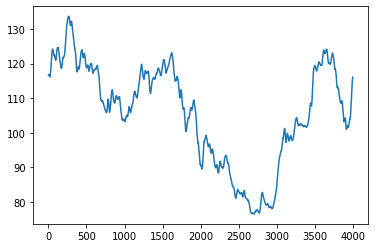

In [158]:
#practice 6-17
mean_fx_jpusdata = fx_jpusdata.rolling(20).mean().dropna()
x = np.arange(len(mean_fx_jpusdata))
plt.plot(x, mean_fx_jpusdata)

In [167]:
#総合問題
student_math_data = pd.read_csv('student-mat.csv', sep=';')
student_math_data.groupby(['age', 'sex'])['G1'].mean().unstack()

sex,F,M
age,,
15,10.052632,12.250000
16,10.203704,11.740000
17,11.103448,10.600000
18,10.883721,10.538462
19,10.642857,9.700000
20,15.000000,13.000000
21,NaN,10.000000
22,NaN,6.000000


In [169]:
student_math_data.groupby(['age', 'sex'])['G1'].mean().unstack().dropna()

sex,F,M
age,,
15,10.052632,12.250000
16,10.203704,11.740000
17,11.103448,10.600000
18,10.883721,10.538462
19,10.642857,9.700000
20,15.000000,13.000000
